In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
from collections import Counter
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=90

In [2]:
# Setting path for ntlk

In [48]:
nltk.data.path.append(r"C:\Users\ASUS\AppData\Roaming\nltk_data")

### Loading The Dataset

In [4]:
true=pd.read_csv(r"True.csv",encoding='latin-1')

In [5]:
fake=pd.read_csv(r"Fake.csv",encoding='latin1')

In [6]:
true=true.iloc[:,:4]

In [7]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  31-Dec-17  
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews  29-Dec-17  
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews  31-Dec-17  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews  30-Dec-17  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews  29-Dec-17

In [8]:
fake=fake.iloc[:,:4]

In [9]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  
0  Donald Trump just couldn t wish all Americans ...    News  31-Dec-17  
1  House Intelligence Committee Chairman Devin Nu...    News  31-Dec-17  
2  On Friday, it was revealed that former Milwauk...    News  30-Dec-17  
3  On Christmas day, Donald Trump announced that ...    News  29-Dec-17  
4  Pope Francis used his annual Christmas Day mes...    News  25-Dec-17

## EDA

In [10]:
# adding labels to the data as true and false

In [11]:
true['label']=0 # true
fake['label']=1 # false

#### Countplot for the subject column for true and fake data

In [12]:
values=['News','left-news','politics','Goverment News','Middle-east']
filter_data_fake=fake[fake['subject'].isin(values)]

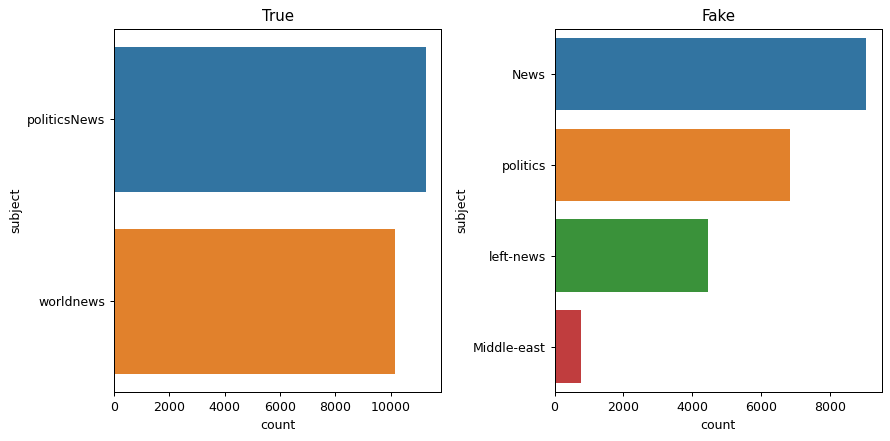

In [13]:
plt.subplot(1,2,1)
sns.countplot(data=true,y='subject',orient='h')
plt.title('True')
plt.subplot(1,2,2)
sns.countplot(y=filter_data_fake['subject'],orient='h')
plt.title('Fake')
plt.tight_layout()

#### Graph for Number of words appearing in each news text

Text(0.5, 1.0, 'Number of Words in News Articles (fake_data)')

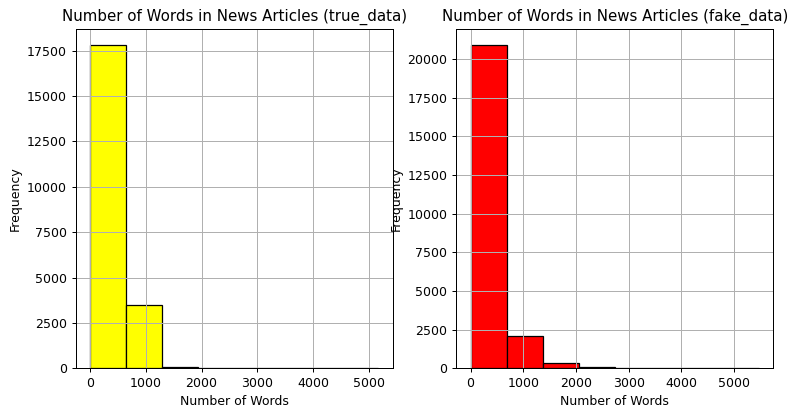

In [14]:
plt.subplot(1,2,1)
true['text'].apply(lambda x: len(x.split())).hist(bins=8, color='yellow', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Number of Words in News Articles (true_data)')

plt.subplot(1,2,2)
fake['num_words'] = fake['text'].apply(lambda x: len(str(x).split()))

fake['num_words'].hist(bins=8, color='red', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Number of Words in News Articles (fake_data)')

In [15]:
# analysis of the data

In [16]:
true.shape

(21416, 5)

In [17]:
fake.shape

(23521, 6)

#### checking for the duplicated values

In [18]:
true.duplicated().sum()

206

In [19]:
fake.duplicated().sum()

43

In [20]:
# removing the duplicated values

In [21]:
true.drop_duplicates(inplace=True)
fake.drop_duplicates(inplace=True)

In [22]:
true.duplicated().sum(),fake.duplicated().sum()

(0, 0)

#### Checking for null values in the dataset

In [23]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [24]:
fake.isnull().sum()

title         1
text          1
subject      12
date         12
label         0
num_words     0
dtype: int64

In [25]:
# dropping all the null record from the fake dataset

In [26]:
fake.dropna(inplace=True)

In [27]:
fake.isnull().sum()

title        0
text         0
subject      0
date         0
label        0
num_words    0
dtype: int64

###  Transforming text Into Data

In [28]:
text_true=true['text']
text_fake=fake['text']
title_true=true['title']
title_fake=fake['title']

In [29]:
title_true[0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [30]:
title_fake[0]

' Donald Trump Sends Out Embarrassing New Year\x19s Eve Message; This is Disturbing'

In [31]:
text_true.head()

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

In [32]:
text_fake.head()

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

### Data Cleaning

In [33]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    return text

In [34]:
text_true=text_true.apply(preprocess_text)
text_fake=text_fake.apply(preprocess_text)
title_true=title_true.apply(preprocess_text)
title_fake=title_fake.apply(preprocess_text)

In [35]:
title_true[0]

'as u.s. budget fight looms, republicans flip their fiscal script'

In [36]:
title_fake[0]

' donald trump sends out embarrassing new year\x19s eve message; this is disturbing'

In [37]:
text_fake[0]

'donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump () december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t even allow him to 

In [38]:
def preprocess_text_1(paragraph):
    # Remove parentheses '()'
    paragraph = re.sub(r'\([^)]*\)', '', paragraph)
    # Remove commas ','
    paragraph = re.sub(r',', '', paragraph)
    # Remove slashes '/'
    paragraph = re.sub(r'/', '', paragraph)
    # Remove digits
    paragraph = re.sub(r'\d', '', paragraph)
    # Remove URLs starting with 'pic.twitter.com/'
    paragraph = re.sub(r'pic\.twitter\.com/[\w\d]+', '', paragraph)
    # Remove ?, !, -, and . characters
    paragraph = re.sub(r'[?!.;\-]', '', paragraph)
    # Remove '\x19', '\x18', and '$' characters
    paragraph = paragraph.replace('\x19', '').replace('\x18', '').replace('$', '')
    # Remove URLs like "pictwittercom..."
    paragraph = re.sub(r'pictwittercom[\w\d]+', '', paragraph)
    # Remove '#' symbols
    paragraph = paragraph.replace('#', '')
    # Remove colons ':'
    paragraph = paragraph.replace(':', '')
    # Remove single quotes '\'
    paragraph = paragraph.replace('\'', '')
    # Remove [ ] & *
    paragraph = paragraph.replace('[', '').replace(']', '').replace('&', '').replace('*', '')
    # Remove extra spaces
    paragraph = re.sub(r'\s+', ' ', paragraph)
    return paragraph


In [39]:
text_true=text_true.apply(lambda x:preprocess_text_1(x))
text_fake=text_fake.apply(lambda x:preprocess_text_1(x))

In [40]:
title_true=title_true.apply(lambda x:preprocess_text_1(x))
title_fake=title_fake.apply(lambda x:preprocess_text_1(x))

In [41]:
title_true[0]

'as us budget fight looms republicans flip their fiscal script'

In [42]:
title_fake[0]

' donald trump sends out embarrassing new years eve message this is disturbing'

In [43]:
text_true[0]

'washington the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure pub

In [44]:
text_fake[0]

'donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year president angry pants tweeted will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year will be a great year for america donald j trump december trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of decency won t even allow him to rise above the gutter long enough to wish the american

### Tokenization,Stemming,Lemmatization

In [45]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

In [46]:
ls=LancasterStemmer()
lem=WordNetLemmatizer()

def lexicon_normalization(text1):
    words = word_tokenize(text1)

    # 1. Stemming
    words_stem = [ls.stem(w) for w in words]

    # 2. Lemmatization
    words_lem = [lem.lemmatize(w) for w in words]
    
    return words_lem

In [49]:
clean_text_true=text_true.apply(lambda x:lexicon_normalization(x))

In [50]:
clean_text_fake=text_fake.apply(lambda x:lexicon_normalization(x))

In [51]:
clean_title_true=title_true.apply(lambda x:lexicon_normalization(x))
clean_title_fake=title_fake.apply(lambda x:lexicon_normalization(x))

In [52]:
clean_title_true

0        [a, u, budget, fight, loom, republican, flip, ...
1        [u, military, to, accept, transgender, recruit...
2        [senior, u, republican, senator, let, mr, muel...
3        [fbi, russia, probe, helped, by, australian, d...
4        [trump, want, postal, service, to, charge, muc...
                               ...                        
21411    [fully, committed, nato, back, new, u, approac...
21412    [lexisnexis, withdrew, two, product, from, chi...
21413    [minsk, cultural, hub, becomes, haven, from, a...
21414    [vatican, upbeat, on, possibility, of, pope, f...
21415    [indonesia, to, buy, billion, worth, of, russi...
Name: title, Length: 21210, dtype: object

In [53]:
clean_title_fake

0        [donald, trump, sends, out, embarrassing, new,...
1        [drunk, bragging, trump, staffer, started, rus...
2        [sheriff, david, clarke, becomes, an, internet...
3        [trump, is, so, obsessed, he, even, ha, obamas...
4        [pope, francis, just, called, out, donald, tru...
                               ...                        
23516    [mcpain, john, mccain, furious, that, iran, tr...
23517    [justice, yahoo, settle, email, privacy, class...
23518    [sunnistan, u, and, allied, safe, zone, plan, ...
23519    [how, to, blow, million, al, jazeera, america,...
23520    [u, navy, sailor, held, by, iranian, military,...
Name: title, Length: 23466, dtype: object

#### Removing The stopwords

In [54]:
from nltk.corpus import stopwords

In [55]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
def remove_stopwords(words):
    stop_words=set(stopwords.words('english'))
    
    filtered_words=[word for word in words if word.lower() not in stop_words]
    
    return filtered_words

In [57]:
clean_text_true_1=[remove_stopwords(words) for words in clean_text_true]
clean_text_fake_1=[remove_stopwords(words) for words in clean_text_fake]

In [58]:
clean_title_true_1=[remove_stopwords(words) for words in clean_title_true]
clean_title_fake_1=[remove_stopwords (words) for words in clean_title_fake]

In [59]:
clean_title_true_1[0]

['u', 'budget', 'fight', 'loom', 'republican', 'flip', 'fiscal', 'script']

In [60]:
clean_title_fake_1[0]

['donald',
 'trump',
 'sends',
 'embarrassing',
 'new',
 'year',
 'eve',
 'message',
 'disturbing']

In [61]:
clean_text_true_1

[['washington',
  'head',
  'conservative',
  'republican',
  'faction',
  'u',
  'congress',
  'voted',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'pay',
  'tax',
  'cut',
  'called',
  'fiscal',
  'conservative',
  'sunday',
  'urged',
  'budget',
  'restraint',
  'keeping',
  'sharp',
  'pivot',
  'way',
  'among',
  'republican',
  'u',
  'representative',
  'mark',
  'meadow',
  'speaking',
  'cbs',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmaker',
  'bracing',
  'battle',
  'january',
  'return',
  'holiday',
  'wednesday',
  'lawmaker',
  'begin',
  'trying',
  'pas',
  'federal',
  'budget',
  'fight',
  'likely',
  'linked',
  'issue',
  'immigration',
  'policy',
  'even',
  'november',
  'congressional',
  'election',
  'campaign',
  'approach',
  'republican',
  'seek',
  'keep',
  'control',
  'congress',
  'president',
  'donald',
  'trump',
  'republican',
  'want',
  'big',
  'budget',
  'increase',
  'milita

### Most Common word

#### 1.most common word in true data

In [76]:
all_words_true = [word for sublist in clean_text_true_1 for word in sublist]

word_counts_true = Counter(all_words_true)

temp_true = pd.DataFrame(word_counts_true.most_common(20), columns=['Common_words_true', 'count'])

styled_temp_true = temp_true.style.background_gradient(cmap="Blues")
display(styled_temp_true)


all_words_title_true = [word for sublist in clean_title_true_1 for word in sublist]

word_counts_title_true = Counter(all_words_title_true)

temp_title_true = pd.DataFrame(word_counts_title_true.most_common(20), columns=['Common_words_title_true', 'count'])

styled_temp_title_true = temp_title_true.style.background_gradient(cmap="Blues")
display(styled_temp_title_true)

In [77]:
fig = px.bar(temp_true, x='count', y='Common_words_true', title="Common words in Text", orientation='h',
             width=700, height=700, color='Common_words_true')
fig.show()

#### 2.most common word in fake data

In [78]:
all_words_fake = [word for sublist in clean_text_fake_1 for word in sublist]

word_counts_fake = Counter(all_words_fake)

temp_fake = pd.DataFrame(word_counts_fake.most_common(20), columns=['Common_words_fake', 'count'])

styled_temp_fake = temp_fake.style.background_gradient(cmap="Blues")
display(styled_temp_fake)



all_words_title_fake = [word for sublist in clean_title_fake_1 for word in sublist]

word_counts_title_fake = Counter(all_words_title_fake)

temp_title_fake = pd.DataFrame(word_counts_title_fake.most_common(20), columns=['Common_words_title_fake', 'count'])

styled_temp_title_fake = temp_title_fake.style.background_gradient(cmap="Blues")
display(styled_temp_title_fake)

In [79]:
fig = px.bar(temp_fake, x='count', y='Common_words_fake', title="Common words in Text", orientation='h',
             width=700, height=700, color='Common_words_fake')
fig.show()

In [80]:
clean_text_fake_1[0]

['donald',
 'trump',
 'wish',
 'american',
 'happy',
 'new',
 'year',
 'leave',
 'instead',
 'give',
 'shout',
 'enemy',
 'hater',
 'dishonest',
 'fake',
 'news',
 'medium',
 'former',
 'reality',
 'show',
 'star',
 'one',
 'job',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'supporter',
 'enemy',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'medium',
 'happy',
 'healthy',
 'new',
 'year',
 'president',
 'angry',
 'pant',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'supporter',
 'enemy',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'medium',
 'happy',
 'healthy',
 'new',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'j',
 'trump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',
 'president',
 'sends',
 'new',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infantile',
 'gibberish',
 'trump',
 'lack'

### N-gram Analysis

In [81]:
clean_text_true_1=pd.Series(clean_text_true_1)
clean_text_fake_1=pd.Series(clean_text_fake_1)

##### removing the common list from both the variable that is used for the common word 

In [82]:
# clean_text_true_1 = clean_text_true_1.drop('common_list', axis=0)
# clean_text_fake_1 = clean_text_fake_1.drop('common_list', axis=0)

In [83]:
type(clean_text_true_1)

pandas.core.series.Series

#### 1. N-gram for true data

In [84]:
def generate_ngrams_true(input_list, n):
    ngrams_true = []
    for i in range(len(input_list) - n + 1):
        ngrams_true.append(input_list[i:i + n])
    return ngrams_true

n =3 
ngram_series_true = clean_text_true_1.apply(lambda x: generate_ngrams_true(x, n))

In [85]:
ngram_series_true[0]

[['washington', 'head', 'conservative'],
 ['head', 'conservative', 'republican'],
 ['conservative', 'republican', 'faction'],
 ['republican', 'faction', 'u'],
 ['faction', 'u', 'congress'],
 ['u', 'congress', 'voted'],
 ['congress', 'voted', 'month'],
 ['voted', 'month', 'huge'],
 ['month', 'huge', 'expansion'],
 ['huge', 'expansion', 'national'],
 ['expansion', 'national', 'debt'],
 ['national', 'debt', 'pay'],
 ['debt', 'pay', 'tax'],
 ['pay', 'tax', 'cut'],
 ['tax', 'cut', 'called'],
 ['cut', 'called', 'fiscal'],
 ['called', 'fiscal', 'conservative'],
 ['fiscal', 'conservative', 'sunday'],
 ['conservative', 'sunday', 'urged'],
 ['sunday', 'urged', 'budget'],
 ['urged', 'budget', 'restraint'],
 ['budget', 'restraint', 'keeping'],
 ['restraint', 'keeping', 'sharp'],
 ['keeping', 'sharp', 'pivot'],
 ['sharp', 'pivot', 'way'],
 ['pivot', 'way', 'among'],
 ['way', 'among', 'republican'],
 ['among', 'republican', 'u'],
 ['republican', 'u', 'representative'],
 ['u', 'representative', 'mark

In [143]:
all_words_true

['washington',
 'head',
 'conservative',
 'head',
 'conservative',
 'republican',
 'conservative',
 'republican',
 'faction',
 'republican',
 'faction',
 'u',
 'faction',
 'u',
 'congress',
 'u',
 'congress',
 'voted',
 'congress',
 'voted',
 'month',
 'voted',
 'month',
 'huge',
 'month',
 'huge',
 'expansion',
 'huge',
 'expansion',
 'national',
 'expansion',
 'national',
 'debt',
 'national',
 'debt',
 'pay',
 'debt',
 'pay',
 'tax',
 'pay',
 'tax',
 'cut',
 'tax',
 'cut',
 'called',
 'cut',
 'called',
 'fiscal',
 'called',
 'fiscal',
 'conservative',
 'fiscal',
 'conservative',
 'sunday',
 'conservative',
 'sunday',
 'urged',
 'sunday',
 'urged',
 'budget',
 'urged',
 'budget',
 'restraint',
 'budget',
 'restraint',
 'keeping',
 'restraint',
 'keeping',
 'sharp',
 'keeping',
 'sharp',
 'pivot',
 'sharp',
 'pivot',
 'way',
 'pivot',
 'way',
 'among',
 'way',
 'among',
 'republican',
 'among',
 'republican',
 'u',
 'republican',
 'u',
 'representative',
 'u',
 'representative',
 'mar

In [142]:
all_words_true = [word for ngram_list in ngram_series_true for ngram in ngram_list for word in ngram]

# Join the words to form a single string
ngram_text_true = ' '.join(all_words_true)

# Create the WordCloud object
wordcloud_true = WordCloud(width=1200, height=800, background_color='white', max_words=100).generate(ngram_text_true)


# Plot the WordCloud image
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud_true)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

ValueError: Only supported for TrueType fonts

#### 2. N-gram for fake Data

In [138]:
clean_text_fake_1

0        [donald, trump, wish, american, happy, new, ye...
1        [house, intelligence, committee, chairman, dev...
2        [friday, wa, revealed, former, milwaukee, sher...
3        [christmas, day, donald, trump, announced, wou...
4        [pope, francis, used, annual, christmas, day, ...
                               ...                        
23461    [st, century, wire, say, wire, reported, earli...
23462    [st, century, wire, say, familiar, theme, when...
23463    [patrick, henningsen, st, century, wireremembe...
23464    [st, century, wire, say, al, jazeera, america,...
23465    [st, century, wire, say, wire, predicted, new,...
Length: 23466, dtype: object

In [ ]:
def generate_ngrams_fake(input_list, n):
    ngrams_fake = []
    for i in range(len(input_list) - n + 1):
        ngrams_fake.append(input_list[i:i + n])
    return ngrams_fake

n = 3  
ngram_series_fake = clean_text_fake_1.apply(lambda x: generate_ngrams_fake(x, n))

In [ ]:
ngram_series_fake[0]

In [ ]:
# dropping the common list from the ngram_series_fake

In [ ]:
# ngram_series_fake=ngram_series_fake.drop('common_list', axis=0)

In [ ]:
all_words_fake = [word for ngram_list in ngram_series_fake for ngram in ngram_list for word in ngram]

# Join the words to form a single string
ngram_text_fake = ' '.join(all_words_fake)

# Create the WordCloud object
wordcloud_fake = WordCloud(width=1200, height=800, background_color='white', max_words=100).generate(ngram_text_fake)

# Plot the WordCloud image
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Sentiment Analysis

#### 1.Sentiment Analysis_true

In [98]:
clean_text_true_1=pd.Series(clean_text_true_1)

In [99]:
from textblob import TextBlob

# Assuming clean_text_true is your pandas Series containing lists of text data

# Define a function to perform sentiment analysis on a text
def get_sentiment_true(text):
    blob_true = TextBlob(text)
    return blob_true.sentiment.polarity

# Apply sentiment analysis function to each element in the Series
sentiment_scores_true = clean_text_true_1.apply(lambda x: get_sentiment_true(' '.join(x)))

# Print the sentiment scores
print(sentiment_scores_true)

0        0.027671
1        0.094533
2        0.127165
3        0.031498
4        0.032500
           ...   
21205    0.139050
21206    0.025000
21207    0.023812
21208    0.032863
21209    0.005361
Length: 21210, dtype: float64


#### 2. Sentiment Analysis_fake

In [100]:
from textblob import TextBlob

In [101]:
!pip install TextBlob

In [102]:

# Define a function to perform sentiment analysis on a text
def get_sentiment_fake(text):
    blob_fake = TextBlob(text)
    return blob_fake.sentiment.polarity

# Apply sentiment analysis function to each element in the Series
sentiment_scores_fake = clean_text_fake_1.apply(lambda x: get_sentiment_fake(' '.join(x)))

# Print the sentiment scores
print(sentiment_scores_fake)

0        0.115306
1       -0.013625
2       -0.019491
3       -0.011849
4       -0.000568
           ...   
23461    0.039586
23462    0.121978
23463    0.057997
23464    0.093056
23465    0.021830
Length: 23466, dtype: float64


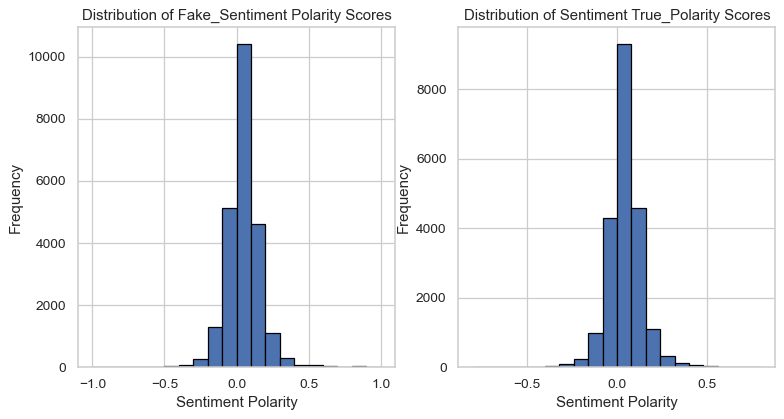

In [103]:
plt.subplot(1,2,1)
plt.hist(sentiment_scores_fake, bins=20, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Fake_Sentiment Polarity Scores')
plt.subplot(1,2,2)
plt.hist(sentiment_scores_true, bins=20, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment True_Polarity Scores')
plt.show()

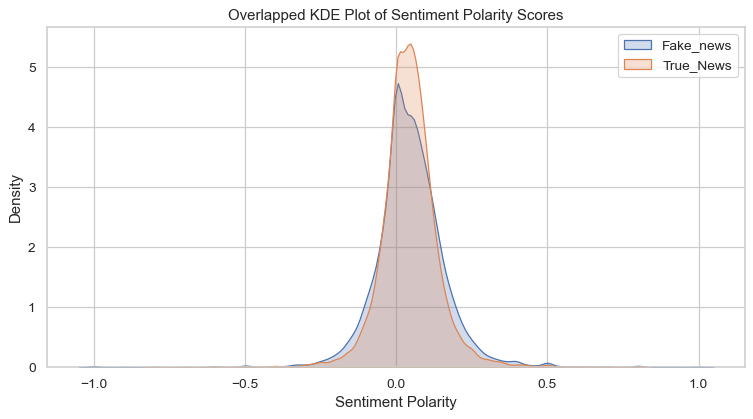

In [104]:
sns.set(style="whitegrid")
sns.kdeplot(sentiment_scores_fake, shade=True, label='Fake_news')
sns.kdeplot(sentiment_scores_true, shade=True, label='True_News')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.title('Overlapped KDE Plot of Sentiment Polarity Scores')

plt.legend()

plt.show()

### Concatenating The Data

#### Converting List Data types into Series

In [105]:
clean_text_true_1=pd.Series(clean_text_true_1)
clean_title_true_1=pd.Series(clean_title_true_1)
clean_text_fake_1=pd.Series(clean_text_fake_1)
clean_title_fake_1=pd.Series(clean_title_fake_1)

In [106]:
concatenated_text_title_true = pd.concat([clean_text_true_1 + clean_title_true_1], ignore_index=True)
concatenated_text_title_fake = pd.concat([clean_text_fake_1 + clean_title_fake_1], ignore_index=True)

In [107]:
final_con_data=pd.concat([concatenated_text_title_true,concatenated_text_title_fake],ignore_index=True)

In [108]:
len(final_con_data)

44676

### Sentiment  

In [109]:
def get_news_sentiment(text1): 
    analysis=TextBlob(text1)
    if analysis.sentiment.polarity>0:
      return'positive'
    elif analysis.sentiment.polarity==0:
      return'neutral'
    else:
      return'negative' 

In [110]:
sentiments_true = [get_news_sentiment(' '.join(str(element) for element in sublist)) for sublist in concatenated_text_title_true]
sentiments_fake = [get_news_sentiment(' '.join(str(element) for element in sublist)) for sublist in concatenated_text_title_fake]

In [111]:
type(sentiments_fake)

list

In [112]:
con_title=pd.concat([clean_title_true_1,clean_title_fake_1],ignore_index=True)
con_text=pd.concat([clean_text_true_1,clean_text_fake_1],ignore_index=True)
con_sentiments=sentiments_true+sentiments_fake

In [113]:
len(con_sentiments)

44676

#### creating a dataframe

In [114]:
data=pd.DataFrame(
{
    'text':final_con_data,
    'sentiments':con_sentiments
})

#### Adding Label column 

In [115]:
num_true = 21210
data['label'] = [0] * num_true + [1] * (len(data) - num_true)

#### Label Encoder on the Sentiments Column

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
label_encoder=LabelEncoder()

In [118]:
data['sentiments'] = label_encoder.fit_transform(data['sentiments'])

In [119]:
data

text  sentiments  label
0      [washington, head, conservative, republican, f...           2      0
1      [washington, transgender, people, allowed, fir...           2      0
2      [washington, special, counsel, investigation, ...           2      0
3      [washington, trump, campaign, adviser, george,...           2      0
4      [seattlewashington, president, donald, trump, ...           2      0
...                                                  ...         ...    ...
44671  [st, century, wire, say, wire, reported, earli...           2      1
44672  [st, century, wire, say, familiar, theme, when...           2      1
44673  [patrick, henningsen, st, century, wireremembe...           2      1
44674  [st, century, wire, say, al, jazeera, america,...           2      1
44675  [st, century, wire, say, wire, predicted, new,...           2      1

[44676 rows x 3 columns]

In [120]:
data['sentiments'].unique()

array([2, 0, 1])

## Model Buiding

In [121]:
data.head()

text  sentiments  label
0  [washington, head, conservative, republican, f...           2      0
1  [washington, transgender, people, allowed, fir...           2      0
2  [washington, special, counsel, investigation, ...           2      0
3  [washington, trump, campaign, adviser, george,...           2      0
4  [seattlewashington, president, donald, trump, ...           2      0

In [122]:
len(data['label'])

44676

In [123]:
# Importing the necessary library

In [124]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [125]:
# Convert 'text' lists to strings
data['text'] = data['text'].apply(lambda x: ' '.join(x))

In [126]:
# Split data into train and test sets
X = data['text']  # Features: 'text' column
y = data['label']  # Target variable: 'label' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Create a CountVectorizer for text data
vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed

# Transform the text data to count-based features
X_train_text_count = vectorizer.fit_transform(X_train)
X_test_text_count = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_text_count, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test_text_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9435989256938228
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4315
           1       0.94      0.95      0.95      4621

    accuracy                           0.94      8936
   macro avg       0.94      0.94      0.94      8936
weighted avg       0.94      0.94      0.94      8936



In [128]:
data

text  sentiments  label
0      washington head conservative republican factio...           2      0
1      washington transgender people allowed first ti...           2      0
2      washington special counsel investigation link ...           2      0
3      washington trump campaign adviser george papad...           2      0
4      seattlewashington president donald trump calle...           2      0
...                                                  ...         ...    ...
44671  st century wire say wire reported earlier week...           2      1
44672  st century wire say familiar theme whenever di...           2      1
44673  patrick henningsen st century wireremember oba...           2      1
44674  st century wire say al jazeera america go hist...           2      1
44675  st century wire say wire predicted new year lo...           2      1

[44676 rows x 3 columns]

In [129]:
type(X_train)

pandas.core.series.Series

In [130]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])
lr_pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred_lr = lr_pipeline.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

# Testing accuracy
y_test_pred_lr = lr_pipeline.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("Logistic Regression")
print(f"Training Accuracy: {train_accuracy_lr:.4f}")
print(f"Testing Accuracy: {test_accuracy_lr:.4f}")


Logistic Regression
Training Accuracy: 0.9894
Testing Accuracy: 0.9816


In [131]:
from sklearn.naive_bayes import BernoulliNB

bnb_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', BernoulliNB())])
bnb_pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred_bnb = bnb_pipeline.predict(X_train)
train_accuracy_bnb = accuracy_score(y_train, y_train_pred_bnb)

# Testing accuracy
y_test_pred_bnb = bnb_pipeline.predict(X_test)
test_accuracy_bnb = accuracy_score(y_test, y_test_pred_bnb)

print("Bernoulli Naive Bayes")
print(f"Training Accuracy: {train_accuracy_bnb:.4f}")
print(f"Testing Accuracy: {test_accuracy_bnb:.4f}")

Bernoulli Naive Bayes
Training Accuracy: 0.9682
Testing Accuracy: 0.9634


In [132]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', PassiveAggressiveClassifier())])
pa_pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred_pa = pa_pipeline.predict(X_train)
train_accuracy_pa = accuracy_score(y_train, y_train_pred_pa)

# Testing accuracy
y_test_pred_pa = pa_pipeline.predict(X_test)
test_accuracy_pa = accuracy_score(y_test, y_test_pred_pa)

print("Passive Aggressive Classifier")
print(f"Training Accuracy: {train_accuracy_pa:.4f}")
print(f"Testing Accuracy: {test_accuracy_pa:.4f}")

Passive Aggressive Classifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9886


In [133]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])
dt_pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred_dt = dt_pipeline.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)

# Testing accuracy
y_test_pred_dt = dt_pipeline.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree")
print(f"Training Accuracy: {train_accuracy_dt:.4f}")
print(f"Testing Accuracy: {test_accuracy_dt:.4f}")


Decision Tree
Training Accuracy: 1.0000
Testing Accuracy: 0.9475


In [134]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])
rf_pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred_rf = rf_pipeline.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Testing accuracy
y_test_pred_rf = rf_pipeline.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest")
print(f"Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Testing Accuracy: {test_accuracy_rf:.4f}")


Random Forest
Training Accuracy: 1.0000
Testing Accuracy: 0.9802


In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])
knn_pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred_knn = knn_pipeline.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)

# Testing accuracy
y_test_pred_knn = knn_pipeline.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print("K Nearest Neighbors")
print(f"Training Accuracy: {train_accuracy_knn:.4f}")
print(f"Testing Accuracy: {test_accuracy_knn:.4f}")


K Nearest Neighbors
Training Accuracy: 0.7138
Testing Accuracy: 0.6639


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree pipeline
dt_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Training accuracy
y_train_pred_best = best_estimator.predict(X_train)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)

# Testing accuracy
y_test_pred_best = best_estimator.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Training Accuracy (Best Estimator): {train_accuracy_best:.4f}")
print(f"Testing Accuracy (Best Estimator): {test_accuracy_best:.4f}")

Best Hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': 30, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Training Accuracy (Best Estimator): 0.9877
Testing Accuracy (Best Estimator): 0.9468


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest pipeline
rf_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Training accuracy
y_train_pred_best = best_estimator.predict(X_train)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)

# Testing accuracy
y_test_pred_best = best_estimator.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Training Accuracy (Best Estimator): {train_accuracy_best:.4f}")
print(f"Testing Accuracy (Best Estimator): {test_accuracy_best:.4f}")

Best Hyperparameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}
Training Accuracy (Best Estimator): 1.0000
Testing Accuracy (Best Estimator): 0.9812


In [147]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Create a Random Forest pipeline with best hyperparameters
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=200
    ))
])

# Fit the pipeline to the training data
rf_pipeline.fit(X_train, y_train)

# Save the trained model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_pipeline, file)